In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/ElectricCarData_Clean.csv')
data = data.dropna()

In [ ]:
# Check for non-numeric values in each column
# coln = ['PriceEuro', 'FastCharge_KmH', 'Range_Km', 'PowerTrain', 'Efficiency_WhKm', 'TopSpeed_KmH', 'AccelSec']
# for col in coln:
#   data = data[pd.to_numeric(data[col], errors='coerce').notnull()]

# data.to_csv('cleaned_data.csv', index=False)

In [ ]:
# Select relevant columns for segmentation
columns = ['PriceEuro', 'FastCharge_KmH', 'Range_Km', 'PowerTrain', 'Efficiency_WhKm', 'TopSpeed_KmH', 'AccelSec']
data_subset = data[columns]

# Convert categorical data to numerical values
data_subset['PowerTrain'] = data_subset['PowerTrain'].map({'AWD': 1, 'RWD': 2, 'FWD': 3})

# Drop rows with missing values if any
data_subset = data_subset.dropna()


<ipython-input-6-3cf94e2fe48e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['PowerTrain'] = data_subset['PowerTrain'].map({'AWD': 1, 'RWD': 2, 'FWD': 3})


In [ ]:
# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_subset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

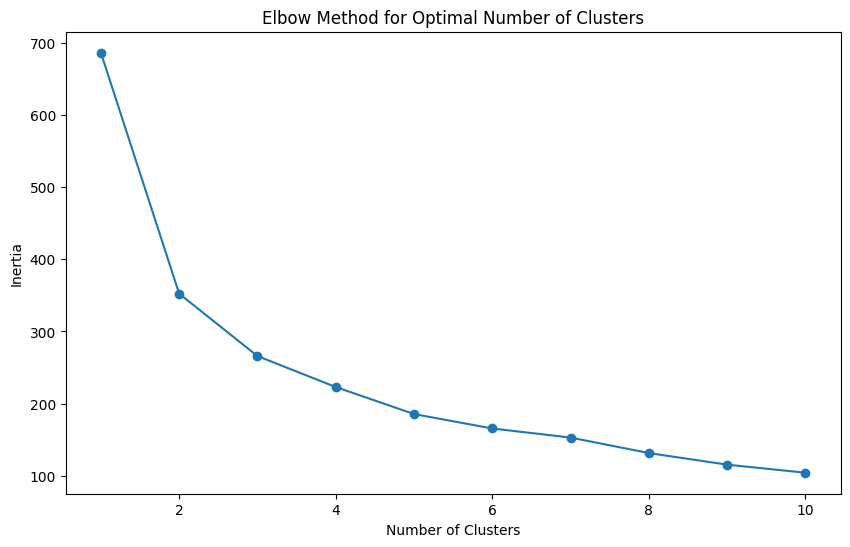

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()





In [ ]:
# From the Elbow plot, choose the number of clusters, e.g., 4
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                           Model  PriceEuro  FastCharge_KmH  Range_Km  \
0  Model 3 Long Range Dual Motor      55480           940.0       450   
1                      ID.3 Pure      30000           250.0       270   
2                              2      56440           620.0       400   
3                           iX3       68040           560.0       360   
4                             e       32997           190.0       170   

  PowerTrain  Efficiency_WhKm  TopSpeed_KmH  AccelSec  Cluster  
0        AWD              161           233       4.6        2  
1        RWD              167           160      10.0        1  
2        AWD              181           210       4.7        0  
3        RWD              206           180       6.8        0  
4        RWD              168           145       9.5        1  


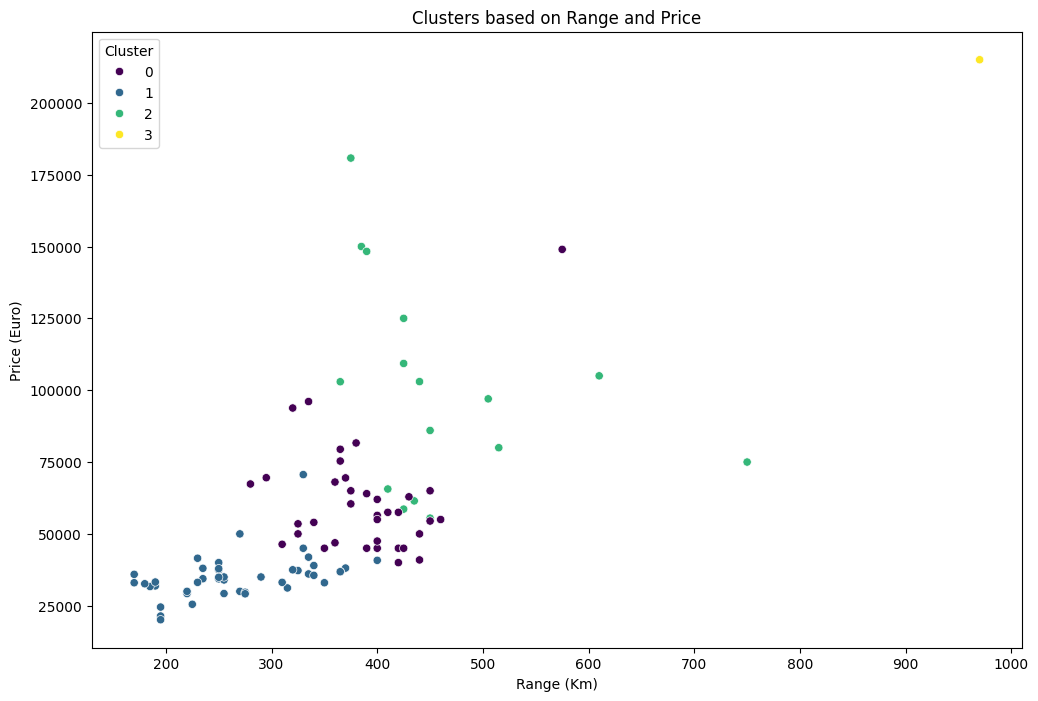

In [ ]:
# Add cluster information to the dataset
data_subset['Cluster'] = data['Cluster']

# Display the data with clusters
print(data[['Model', 'PriceEuro', 'FastCharge_KmH', 'Range_Km', 'PowerTrain', 'Efficiency_WhKm', 'TopSpeed_KmH', 'AccelSec', 'Cluster']].head())

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Range_Km', y='PriceEuro', hue='Cluster', palette='viridis')
plt.title('Clusters based on Range and Price')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.legend(title='Cluster')
plt.show()